### Problem Statement: Loan Status Prediction

Objective: Build a Loan Prediction System using ML which can predict the eligibility status of customer/user for loan

---



In [1337]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1338]:
import warnings
warnings.simplefilter("ignore")

In [1339]:
import numpy as np
import pandas as pd
import os

In [1340]:
path = "/content/drive/My Drive/Innovation/loan_status.csv"

In [1341]:
df = pd.read_csv(path)

In [1342]:
df = pd.DataFrame(df)

In [1343]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


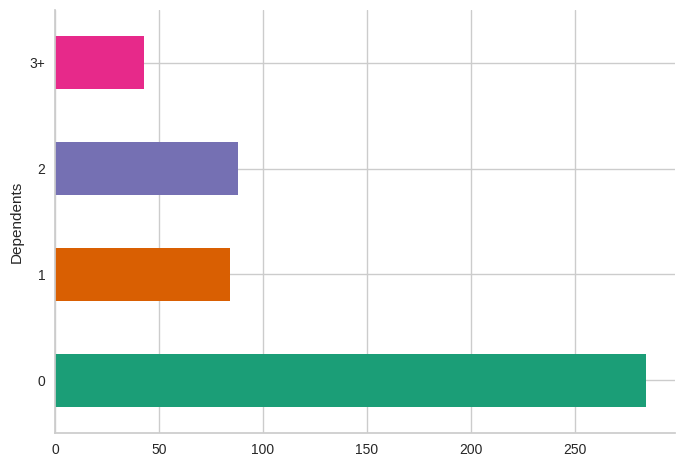

In [1430]:
# @title Dependents

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Dependents').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1344]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1345]:
import seaborn as sns

In [1346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1347]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1348]:
df_unfiltered = df

In [1349]:
df = df.dropna()

In [1350]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1351]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1352]:
# Handling Categorical Null Values
df['Gender'].fillna(df['Gender'].mode()[0],
                      inplace = True)
df['Married'].fillna(df['Married'].mode()[0],
                       inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],
                         inplace = True)
df['Education'].fillna(df['Education'].mode()[0],
                         inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],
                             inplace = True)

In [1353]:
df_original = df

In [1354]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1355]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

### Exploratory Data Analysis

## Line Plot

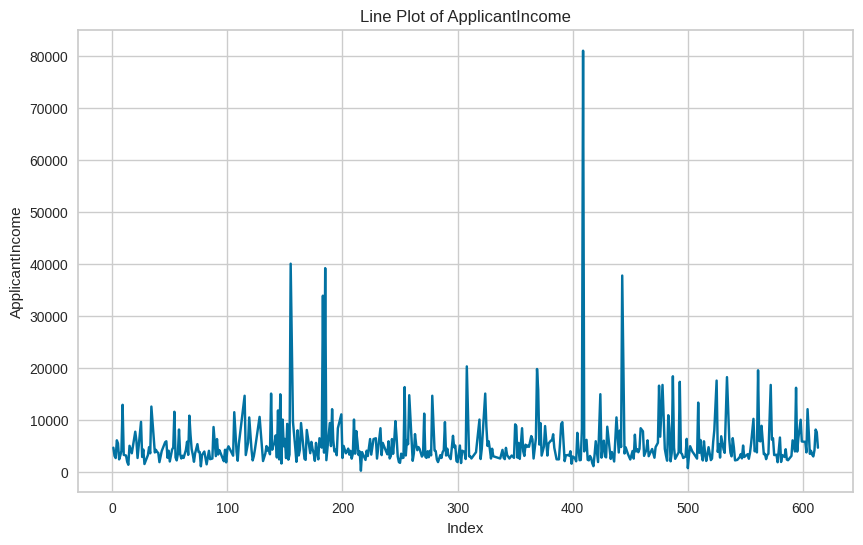

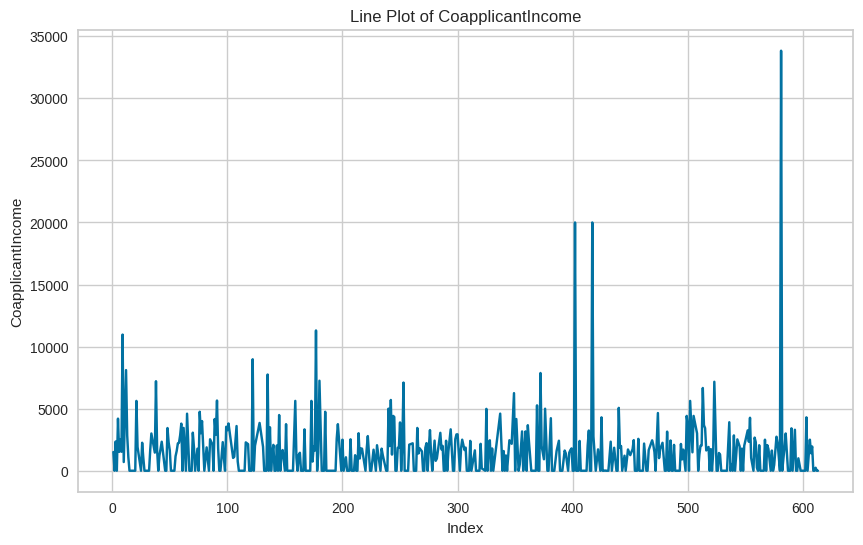

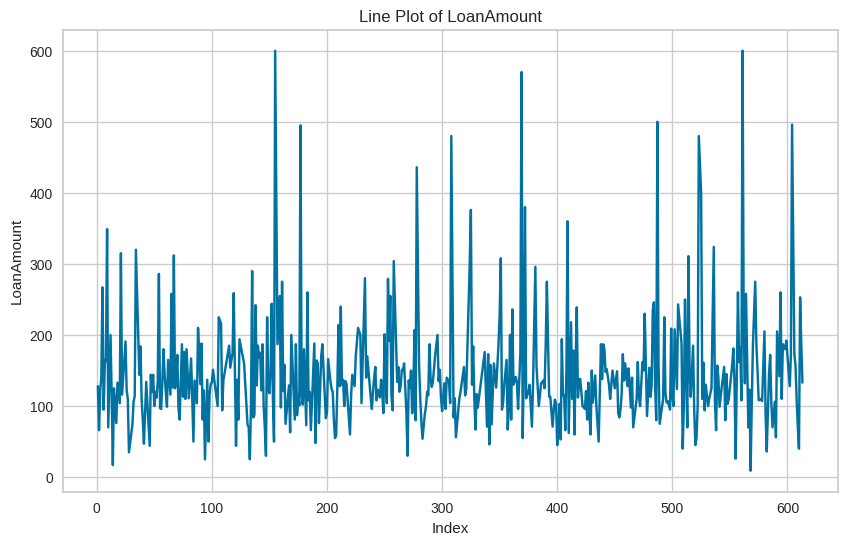

In [1356]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[col])
    plt.title(f'Line Plot of {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

## Stack Bar

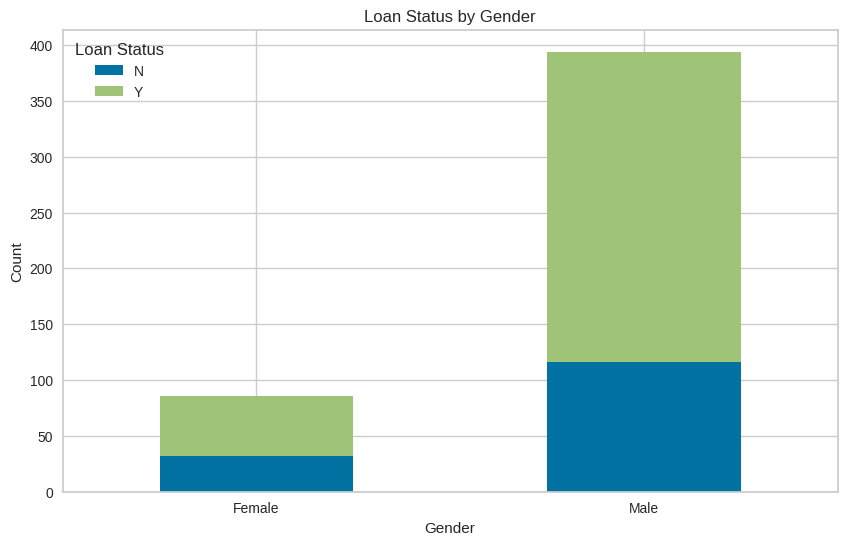

In [1357]:
# Group by categorical variables and loan status, and calculate the count
grouped = df.groupby(['Gender', 'Loan_Status']).size().unstack()

# Plot stacked bar plot
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Loan Status')
plt.show()

## Histograms

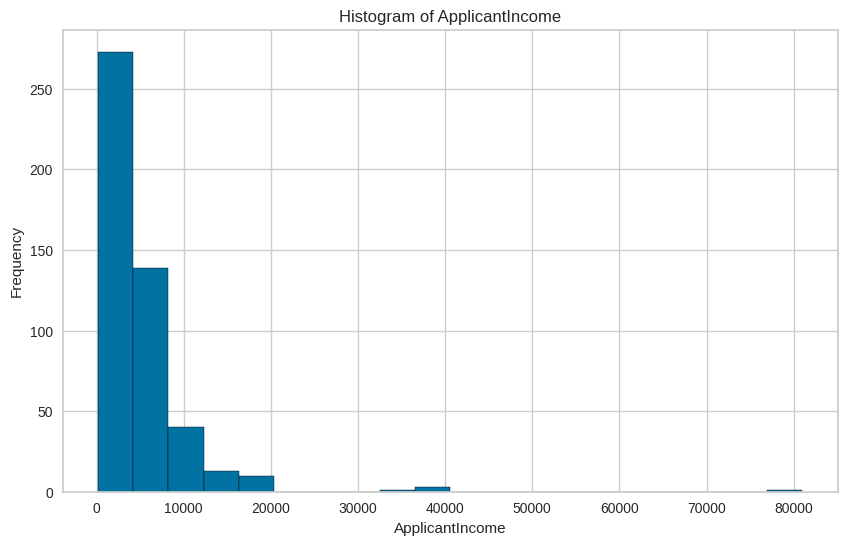

In [1358]:
col = numerical_cols[0]
plt.figure(figsize=(10, 6))
plt.hist(df[col], bins=20, edgecolor='black')
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Applicant Income(Right Skewed)
- The majority of applicants have relatively lower incomes.
- There is a smaller subset of applicants with significantly higher incomes, causing the distribution to be right-skewed.

Interpretations:
- The majority of loan applicants belong to middle or lower-income groups.
- A small percentage of applicants may belong to higher-income groups, possibly indicating individuals with greater financial stability or higher-paying jobs.

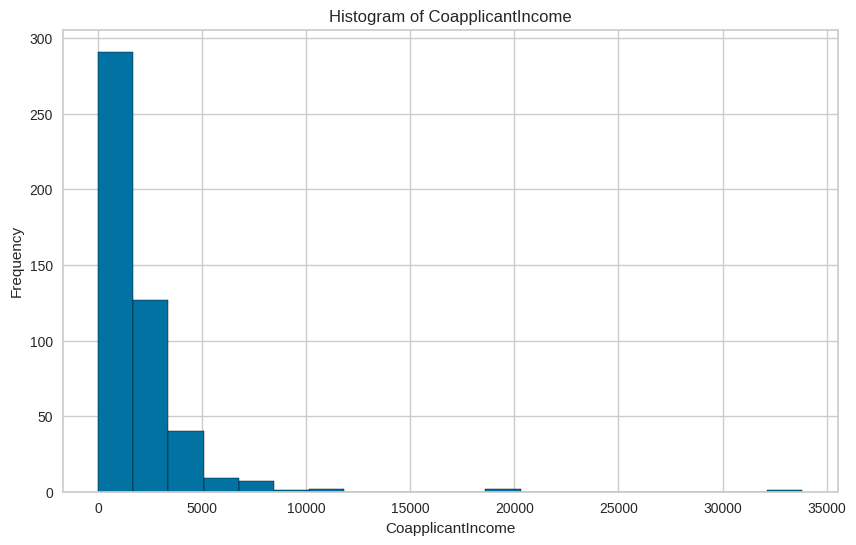

In [1359]:
col = numerical_cols[1]
plt.figure(figsize=(10, 6))
plt.hist(df[col], bins=20, edgecolor='black')
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Coapplicant Income(Right Skewed)
- Similar to Applicant Income, the distribution of Coapplicant - Income is right-skewed, indicating a higher concentration of lower values and a tail extending towards higher values.
- A majority of applicants have lower or no coapplicant income, with a smaller proportion having higher coapplicant incomes.

Interpretations:
- Many loan applicants may not have a coapplicant or may rely solely on their own income to support the loan application.
- Some applicants may have a spouse, family member, or business partner contributing to their income, resulting in higher coapplicant incomes for a minority of applicants.


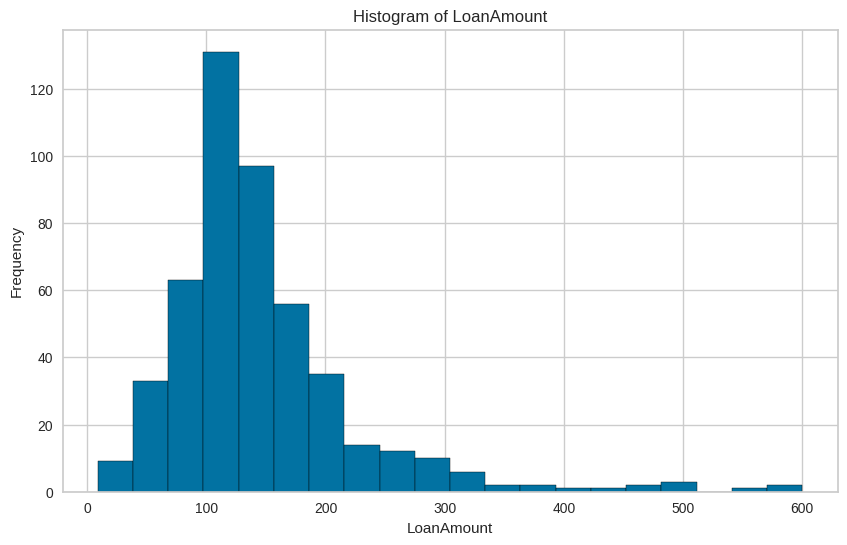

In [1360]:
col = numerical_cols[2]
plt.figure(figsize=(10, 6))
plt.hist(df[col], bins=20, edgecolor='black')
plt.title(f'Histogram of {col}')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

LoanAmount (Symmetric):
- The symmetric distribution of LoanAmount indicates a relatively balanced distribution of loan amounts across applicants, with no apparent skewness towards higher or lower values.

Possible interpretations:
- Loan amounts requested by applicants are evenly distributed, indicating diverse financial needs among applicants.
- Lenders may need to consider a wide range of loan amounts when assessing loan applications, as applicants may require varying levels of financial assistance.

These interpretations provide insights into the financial characteristics of loan applicants and can inform lending decisions, risk assessment, and policy-making processes in the lending industry.

In [1361]:
import plotly.express as px

# Convert Loan_Status to numeric for visualization
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Scatter plot
scatter_plot = px.scatter_3d(df, x='ApplicantIncome', y='CoapplicantIncome', z='LoanAmount',
                              color='Loan_Status', opacity=0.7, title='3D Scatter Plot')
scatter_plot.show()

In [1362]:
# Bar chart
bar_chart = px.bar(df, x='Loan_Status', y='ApplicantIncome', color='Education', barmode='group',
                    title='Bar Chart of Applicant Income by Loan Status and Education')
bar_chart.show()

Categorical variables: 0


<Axes: >

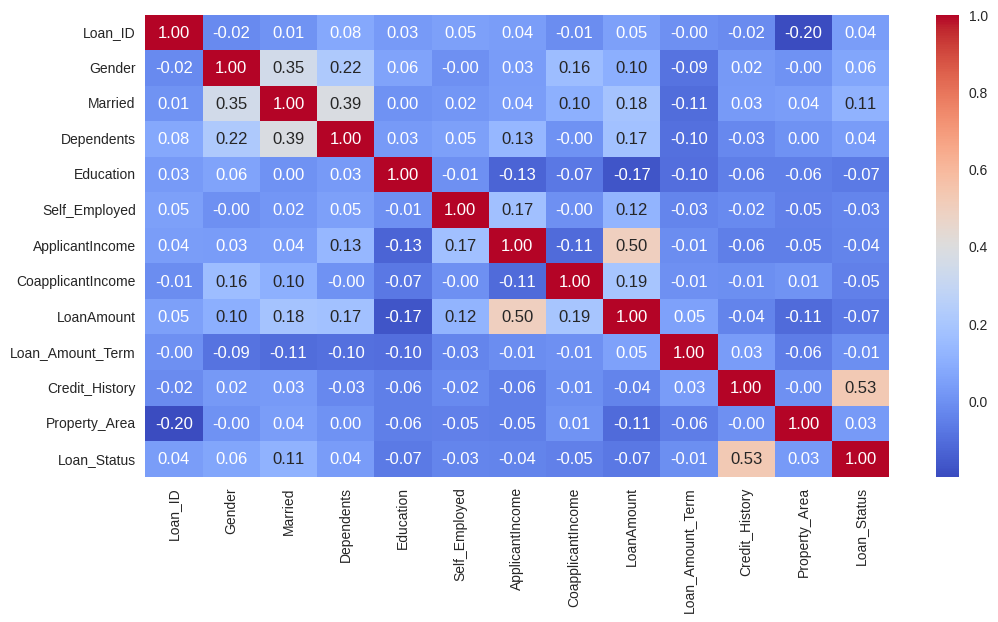

In [1363]:
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

# To find the number of columns with
# datatype==object
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

plt.figure(figsize=(12,6))

sns.heatmap(df.corr(),cmap='coolwarm',fmt='.2f',annot=True)

### Data Modelling

# Random Forest

In [1364]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [1365]:
# Preprocessing
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']

In [1366]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1367]:
# Define column transformer for preprocessing
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [1368]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

In [1369]:
# Data Preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [1370]:
# Random Forest Classifier (RL agent)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [1371]:
# Predictions
train_predictions = rf_classifier.predict(X_train_preprocessed)
test_predictions = rf_classifier.predict(X_test_preprocessed)

In [1372]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy*100,"%")
print("Test Accuracy:", test_accuracy*100,"%")

Train Accuracy: 100.0 %
Test Accuracy: 83.33333333333334 %


In [1373]:
df = df_original

Categorial to Numerical

In [1374]:
df.replace(
    {'Married':{'No':0,'Yes':1},
     'Gender':{'Male':1,'Female':0},
     'Self_Employed':{'Yes':1,'No':0},
     'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},
     'Education':{'Graduate':1,'Not Graduate':0}
     },
    inplace=True)

In [1375]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# Support Vector Machine (SVM)

In [1376]:
from sklearn.svm import SVC

# Support Vector Machine (SVM) Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_preprocessed, y_train)

# Predictions
train_predictions = svm_classifier.predict(X_train_preprocessed)
test_predictions = svm_classifier.predict(X_test_preprocessed)

# Evaluation
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8046875
Test Accuracy: 0.8229166666666666


In [1377]:
df = df_original

In [1378]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Logistic Regresssion

In [1379]:
df = df_original

In [1380]:
# Separate features and target variable
X = df.drop(columns=['Loan_ID', 'Loan_Status', 'Dependents'])  # Drop Loan_ID, Dependents, and Loan_Status
y = df['Loan_Status']

In [1381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1382]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1383]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [1384]:
# Predictions
train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

In [1385]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [1386]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.8072916666666666
Test Accuracy: 0.8229166666666666


### Decision Tree

In [1387]:
from sklearn.tree import DecisionTreeClassifier

In [1388]:
X = df.drop(columns=['Loan_ID', 'Loan_Status', 'Dependents'])
y = df['Loan_Status']

In [1389]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1390]:
# Create and train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1391]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [1392]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.7395833333333334


In [1393]:
df = df_original

### Naive Bayes

In [1394]:
from sklearn.naive_bayes import GaussianNB

In [1395]:
X = df.drop(columns=['Loan_ID', 'Loan_Status', 'Dependents'])  # Drop Loan_ID, Dependents, and Loan_Status
y = df['Loan_Status']

In [1396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1397]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [1398]:
# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [1399]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.7942708333333334
Test Accuracy: 0.8229166666666666


# ANN

In [1400]:
from sklearn.ensemble import GradientBoostingClassifier

In [1401]:
X = df.drop(columns=['Loan_ID', 'Loan_Status', 'Dependents'])
y = df['Loan_Status']

In [1402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1403]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [1404]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [1405]:
df = df_original

In [1406]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1407]:
X = df.drop(columns=['Loan_ID', 'Loan_Status', 'Dependents'])
y = df['Loan_Status']

In [1408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1409]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1410]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [1411]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [1412]:
model.fit(X_train_scaled, y_train, epochs=45, batch_size=32, validation_split=0.2)

Epoch 1/45
10/10 [==============================] - 1s 28ms/step - loss: 0.6606 - accuracy: 0.6743 - val_loss: 0.6425 - val_accuracy: 0.6753
Epoch 2/45
10/10 [==============================] - 0s 9ms/step - loss: 0.6147 - accuracy: 0.7036 - val_loss: 0.6027 - val_accuracy: 0.7273
Epoch 3/45
10/10 [==============================] - 0s 8ms/step - loss: 0.5840 - accuracy: 0.7231 - val_loss: 0.5703 - val_accuracy: 0.7403
Epoch 4/45
10/10 [==============================] - 0s 6ms/step - loss: 0.5580 - accuracy: 0.7296 - val_loss: 0.5453 - val_accuracy: 0.7792
Epoch 5/45
10/10 [==============================] - 0s 7ms/step - loss: 0.5376 - accuracy: 0.7785 - val_loss: 0.5201 - val_accuracy: 0.8312
Epoch 6/45
10/10 [==============================] - 0s 8ms/step - loss: 0.5182 - accuracy: 0.7948 - val_loss: 0.5036 - val_accuracy: 0.8312
Epoch 7/45
10/10 [==============================] - 0s 7ms/step - loss: 0.5059 - accuracy: 0.7980 - val_loss: 0.4893 - val_accuracy: 0.8442
Epoch 8/45
10/10 [=

In [1413]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

3/3 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.8229
Train Accuracy: 0.8489583134651184
Test Accuracy: 0.8229166865348816


LightBGM

In [1414]:
df = df_original

In [1415]:
pip install lightgbm

In [1416]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import  GridSearchCV

In [1417]:
# Feature Engineering: 'TotalIncome'
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Split data into features and target
X = df.drop(columns=['Loan_Status', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'])
y = df['Loan_Status']

# Encode target variable
y_encoded = y.replace({'N': 0, 'Y': 1})

#  categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

#  preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())                # Standardize numerical features
])

# combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])

# Define LightGBM classifier
lgbm_model = LGBMClassifier(random_state=42)

# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', lgbm_model)])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y_encoded)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

## Comparing Models


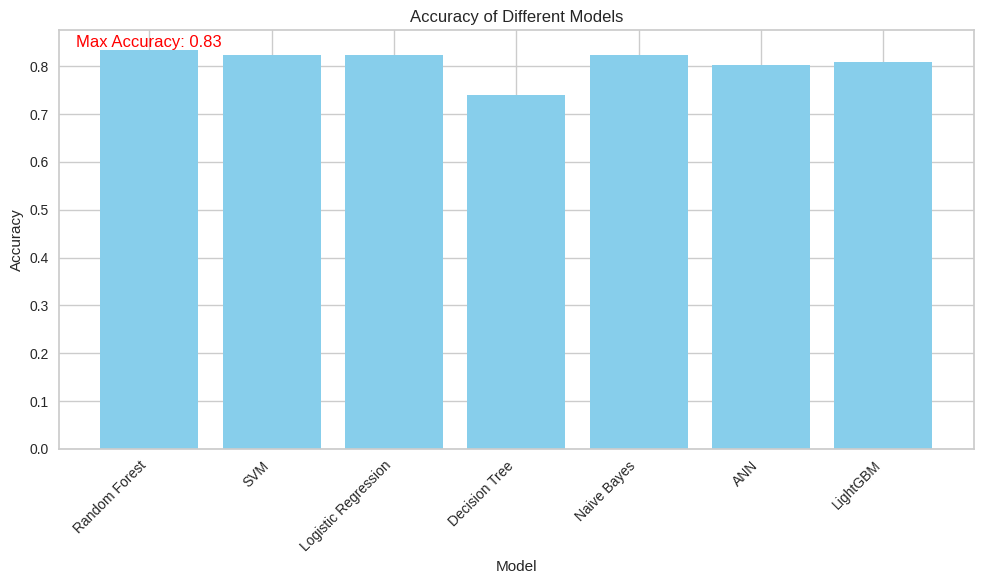

In [1418]:
accuracy_data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree', 'Naive Bayes', 'ANN', 'LightGBM'],
    'Accuracy': [0.8333333333333334, 0.8229166666666666, 0.8229166666666666, 0.7395833333333334, 0.8229166666666666, 0.8020833134651184, 0.8083333333333333]
}

accuracy_df = pd.DataFrame(accuracy_data)

max_accuracy_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax()]

plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')

plt.text(max_accuracy_model['Model'], max_accuracy_model['Accuracy'], f"Max Accuracy: {max_accuracy_model['Accuracy']:.2f}",
         ha='center', va='bottom', color='red')

plt.tight_layout()
plt.show()

### Predictions

In [1422]:
df = df_unfiltered

In [1429]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'], inplace=True)

# Select relevant features and target variable
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Define the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the full dataset
model.fit(X, y)

# Function to take user input and predict loan approval
def predict_loan_approval(model, label_encoders):
    # Get user input for person's information
    gender = input("Gender (Male/Female): ")
    married = input("Married (Yes/No): ")
    dependents = int(input("Dependents: "))
    education = input("Education (Graduate/Not Graduate): ")
    self_employed = input("Self Employed (Yes/No): ")
    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_amount_term = float(input("Loan Amount Term (in months): "))
    credit_history = float(input("Credit History (1 for Yes, 0 for No): "))
    property_area = input("Property Area (Urban/Rural/Semiurban): ")

    # Transform user input into DataFrame
    user_data = pd.DataFrame({
        'Gender': [gender],
        'Married': [married],
        'Dependents': [dependents],
        'Education': [education],
        'Self_Employed': [self_employed],
        'ApplicantIncome': [applicant_income],
        'CoapplicantIncome': [coapplicant_income],
        'LoanAmount': [loan_amount],
        'Loan_Amount_Term': [loan_amount_term],
        'Credit_History': [credit_history],
        'Property_Area': [property_area]
    })

    # Encode categorical variables
    for column in user_data.select_dtypes(include=['object']).columns:
        user_data[column] = label_encoders[column].transform(user_data[column])

    # Make prediction
    prediction = model.predict(user_data)
    result = "Approved" if prediction[0] == 'Y' else "Not Approved"
    print(f"\nLoan Status Prediction: {result}")

# Call the function to predict loan approval for user input
cont = True
while cont:
  predict_loan_approval(model, label_encoders)
  print("Do you wish to continue: True/False")
  num = bool(input())

Gender (Male/Female): Male
Married (Yes/No): Yes
Dependents: 0
Education (Graduate/Not Graduate): Graduate
Self Employed (Yes/No): Yes
Applicant Income: 3000
Coapplicant Income: 0
Loan Amount: 66
Loan Amount Term (in months): 360
Credit History (1 for Yes, 0 for No): 1
Property Area (Urban/Rural/Semiurban): Urban

Loan Status Prediction: Approved
Do you wish to continue: True/False
Male
Gender (Male/Female): Male
Married (Yes/No): No
Dependents: 2
Education (Graduate/Not Graduate): Not Graduate
Self Employed (Yes/No): No
Applicant Income: 100
Coapplicant Income: 100
Loan Amount: 100000
Loan Amount Term (in months): 23
Credit History (1 for Yes, 0 for No): 1
Property Area (Urban/Rural/Semiurban): Urban

Loan Status Prediction: Not Approved
Do you wish to continue: True/False
False


KeyboardInterrupt: Interrupted by user